In [68]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
import requests
requests.packages.urllib3.disable_warnings()

"""
Adapted from the Github repo:
https://github.com/ageron/handson-ml
for the 03_classification notebook.
This implementation uses the 'requests' package instead of URLLIB
"""


    # Alternative method to load MNIST, if mldata.org is down
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = requests.get(mnist_alternative_url)
with open(mnist_path, "wb") as f:
   content = response.content
   f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
   "data": mnist_raw["data"].T,
   "target": mnist_raw["label"][0],
   "COL_NAMES": ["label", "data"],
   "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [113]:
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

5.0


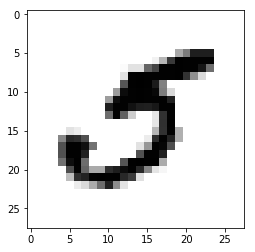

In [114]:
#displaying one digit
import matplotlib
import matplotlib.pyplot as plt
some_digit=X[36000]
reshaped_image=some_digit.reshape(28,28)
plt.imshow(reshaped_image,cmap=matplotlib.cm.binary)
print(y[36000])

In [115]:
x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [116]:
import numpy as np
shuffle_index=np.random.permutation(60000)
shuffle_index
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]

In [117]:
#train only for 5
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [118]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [119]:
sgd_clf.predict([some_digit])


array([ True])

In [120]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3)

array([0.9683 , 0.9658 , 0.95745])

In [121]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
print(y_train_pred.shape)

(60000,)


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53465,  1114],
       [ 1055,  4366]])

In [123]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_pred)


0.7967153284671533

In [124]:
recall_score(y_train_5,y_train_pred)

0.8053864600627191

In [125]:
f1_score(y_train_5,y_train_pred)

0.8010274286762683

In [126]:
y_score=sgd_clf.decision_function([some_digit])
print(y_score)
threshold=0
y_some_digit_pred=(y_score>threshold)
y_some_digit_pred

[249557.54229747]


array([ True])

In [127]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train,cv=3,method='decision_function')

In [128]:
print(y_scores.shape)
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
print(y_scores.shape)

(60000, 10)
(60000,)


In [129]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

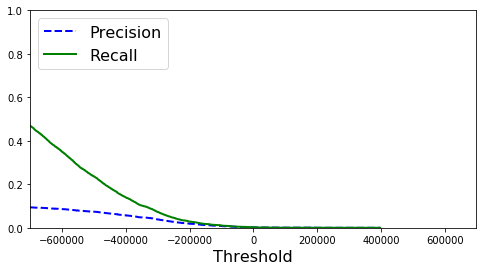

In [130]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

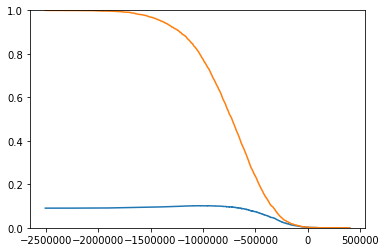

In [131]:
plot_precision_recall_threshold(precisions,recalls,thresholds)

In [132]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

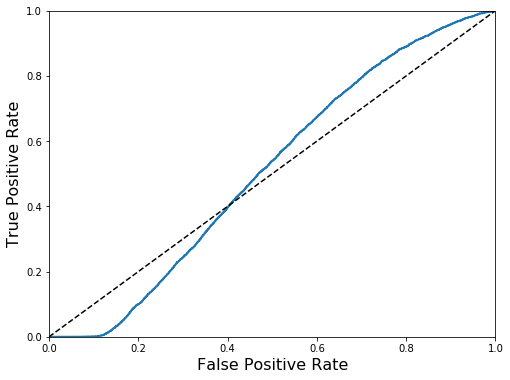

In [133]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [134]:
sgd_clf.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [135]:
sgd_clf.predict([some_digit])

array([5.])

In [138]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-183231.0597171 , -354554.73329583, -222034.56406611,
        -174380.61101936, -364811.80857659,  249557.54229747,
        -815330.55126599, -212106.85398799, -766445.02224676,
        -741919.26356694]])

In [142]:
sgd_clf.classes_


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [144]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/ana

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/ana

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/venkat/ana

45

In [150]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [151]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0.1, 0. , 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [152]:
cross_val_score(sgd_clf,x_train,y_train,cv=3)

array([0.86587682, 0.86104305, 0.86718008])

In [153]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [154]:
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3)

array([0.9075185 , 0.90864543, 0.91083663])

In [155]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)

In [156]:
conf_mx

array([[5725,    3,   20,   12,   11,   53,   45,    9,   41,    4],
       [   2, 6465,   49,   24,    5,   43,    7,   15,  124,    8],
       [  51,   41, 5307,  114,   80,   24,   91,   59,  175,   16],
       [  47,   41,  135, 5348,    1,  228,   34,   61,  135,  101],
       [  19,   28,   44,   10, 5361,   10,   49,   35,   78,  208],
       [  77,   45,   33,  186,   74, 4627,  106,   27,  157,   89],
       [  34,   25,   46,    1,   47,   94, 5618,    7,   46,    0],
       [  23,   17,   71,   24,   45,   11,    3, 5849,   15,  207],
       [  41,  152,   67,  164,   15,  167,   54,   28, 5020,  143],
       [  42,   36,   25,   87,  170,   39,    2,  245,   83, 5220]])

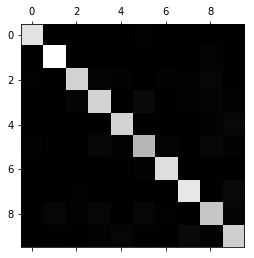

In [166]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
#print(5725+3+20+12+11+53+45+9+41+4)

In [167]:
rows_sum=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/rows_sum
norm_conf_mx

array([[9.66570994e-01, 5.06500084e-04, 3.37666723e-03, 2.02600034e-03,
        1.85716698e-03, 8.94816816e-03, 7.59750127e-03, 1.51950025e-03,
        6.92216782e-03, 6.75333446e-04],
       [2.96647879e-04, 9.58914269e-01, 7.26787303e-03, 3.55977455e-03,
        7.41619697e-04, 6.37792940e-03, 1.03826758e-03, 2.22485909e-03,
        1.83921685e-02, 1.18659152e-03],
       [8.55991944e-03, 6.88150386e-03, 8.90735146e-01, 1.91339376e-02,
        1.34273246e-02, 4.02819738e-03, 1.52735817e-02, 9.90265190e-03,
        2.93722726e-02, 2.68546492e-03],
       [7.66595988e-03, 6.68732670e-03, 2.20192465e-02, 8.72288371e-01,
        1.63105529e-04, 3.71880607e-02, 5.54558800e-03, 9.94943729e-03,
        2.20192465e-02, 1.64736585e-02],
       [3.25231085e-03, 4.79287915e-03, 7.53166724e-03, 1.71174255e-03,
        9.17665183e-01, 1.71174255e-03, 8.38753851e-03, 5.99109894e-03,
        1.33515919e-02, 3.56042451e-02],
       [1.42040214e-02, 8.30105147e-03, 6.08743774e-03, 3.43110127e-02,
   

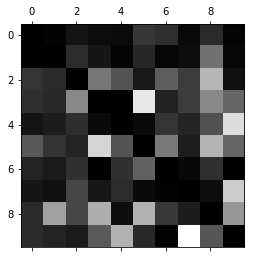

In [168]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)


In [ ]:
cl_a,cl_b=3,5